In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EF9336198>,
      dtype=object)

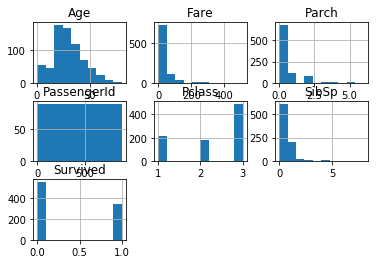

In [4]:
df.hist()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [8]:
x = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
x_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [9]:
x = x.dropna()
x_test = x_test.dropna()
y = x.loc[:,'Survived']
x = x.drop('Survived',axis = 1)

In [10]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S
9,2,female,14.000000,1,0,30.0708,C


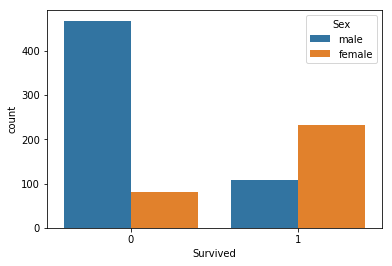

In [11]:
sns.countplot(x = 'Survived',hue = 'Sex',data = df)
# this shows that female count of survival is more than the male , and the no. of male death is more than the female .

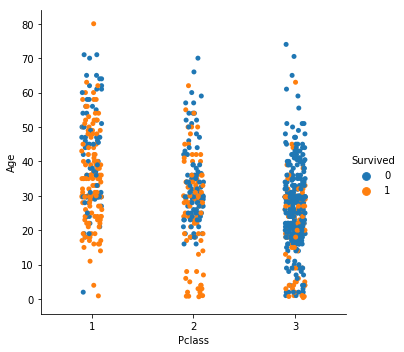

In [12]:
sns.catplot(x= 'Pclass',y = 'Age',hue = 'Survived',data = df)

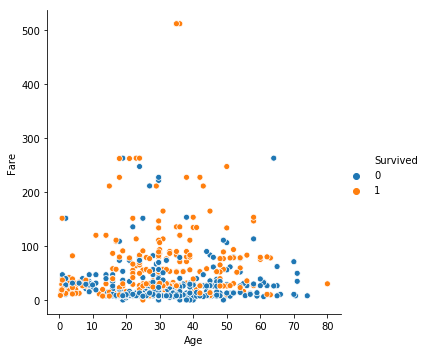

In [13]:
sns.relplot(x= 'Age',y = 'Fare',hue = 'Survived',data = df)

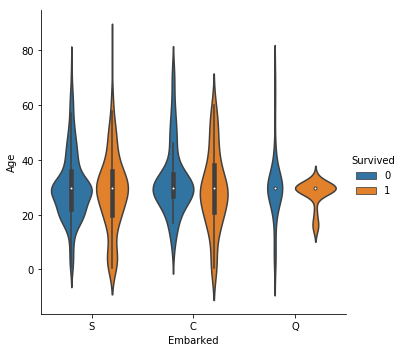

In [14]:
sns.catplot(x = 'Embarked', y = 'Age',hue = 'Survived',kind = 'violin',data = df)

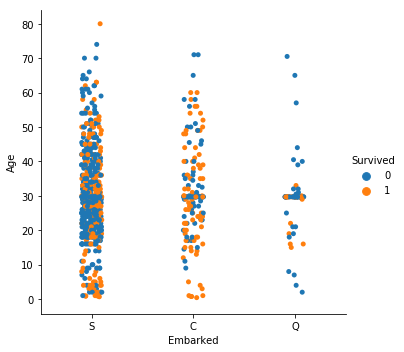

In [15]:
sns.catplot(x = 'Embarked' , y = 'Age',hue = 'Survived',data = df)

In [16]:
y = y.values
x = x.values
x_test = x_test.values

In [17]:
x

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [18]:
x_test

array([[3, 'male', 34.5, ..., 0, 7.8292, 'Q'],
       [3, 'female', 47.0, ..., 0, 7.0, 'S'],
       [2, 'male', 62.0, ..., 0, 9.6875, 'Q'],
       ...,
       [3, 'male', 38.5, ..., 0, 7.25, 'S'],
       [3, 'male', 30.272590361445783, ..., 0, 8.05, 'S'],
       [3, 'male', 30.272590361445783, ..., 1, 22.3583, 'C']],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
x[:,1] =  le.fit_transform(x[:,1])
x_test[:,1] =  le.fit_transform(x_test[:,1])
x[:,6] = le.fit_transform(x[:,6])
x_test[:,6] = le.fit_transform(x_test[:,6])

In [23]:
np.set_printoptions(threshold = np.nan) # to show all values of numpy array

In [24]:
x

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574, 0.        ],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.01546857, 1.        ],
       [0.        , 0.        , 0.43453129, 0.125     , 0.        ,
        0.1036443 , 1.        ],
       [1.        , 1.        , 0.43453129, 0.        , 0.        ,
        0.01571255, 1.        ],
       [1.        , 1.        , 0.36792055, 0.        , 0.        ,
        0.0165095 , 0.5       ],
       [0.        , 1.        , 0.67328474, 0.        , 0.        ,
        0.10122886, 1.        ],
       [1.        , 1.        , 0.01985423, 0.375     , 0.16666667,
        0.04113566, 1.        ],
       [1.        , 0.        , 0.33400352, 0.        , 0.33333333,
        0.02173075, 1.        ],
       [0.5       , 0.        , 0.17064589, 0.125     , 0.        ,
        0.05869429, 0. 

In [ ]:
x_test

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
x = ohe.fit_transform(x).toarray()

In [ ]:
x = x[:,1:]

In [ ]:
x

In [ ]:
x_test = ohe.fit_transform(x_test).toarray()

In [ ]:
x_test

In [ ]:
x_test = x_test[:,1:]

In [ ]:
x_test

In [ ]:
ohe1 = OneHotEncoder(categorical_features = [-1])
x = ohe1.fit_transform(x).toarray()

In [ ]:
x = x[:,1:]

In [ ]:
x

In [ ]:
x_test = ohe1.fit_transform(x_test).toarray()

In [ ]:
x_test = x_test[:,1:]

In [ ]:
x_test

Now let's do Machine learning work

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x,y)
y_pred = log.predict(x)
y_test = log.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
confusion_matrix(y,y_pred)

In [ ]:
accuracy_score(y,y_pred)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x,y)
y_pred = svc.predict(x)
y_test = svc.predict(x_test)
accuracy_score(y,y_pred)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['PassengerId'] = df_test['PassengerId'] 
submission['Survived'] = pd.DataFrame( y_test)

In [ ]:
submission.to_csv('submission.csv',index = False)

In [ ]:
accuracy_score(y,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x,y)
y_pred = knn.predict(x)
y_test = knn.predict(x_test)
accuracy_score(y,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x,y)
y_pred = dtc.predict(x)
y_test = dtc.predict(x_test)
accuracy_score(y,y_pred)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['PassengerId'] = df_test['PassengerId'] 

In [ ]:
submission['Survived'] = pd.DataFrame( y_test)

In [ ]:
submission.to_csv('submission.csv',index = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)
y_pred = rfc.predict(x) 
y_test = rfc.predict(x_test)
accuracy_score(y,y_pred)